<a href="https://colab.research.google.com/github/suneed/MFM702-Project/blob/master/MFM702_FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MFM 702 PROJECT**




ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


In [0]:
!jupyter nbconvert --to html /content/drive/"My Drive"/"Colab Notebooks"/MFM702-FinalProject.ipynb

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/MFM702-FinalProject.ipynb to html
[NbConvertApp] Writing 749719 bytes to /content/drive/My Drive/Colab Notebooks/MFM702-FinalProject.html


In [0]:
ls /content/drive/"My Drive"/"Colab Notebooks"/MFM702-FinalProject.ipynb

'/content/drive/My Drive/Colab Notebooks/MFM702-FinalProject.ipynb'


In [0]:
pwd

'/content'

**Sunny Dhaliwal** \\
Done in Python 3 using Google Collab 

In [0]:
#This is just to load in the files to the project
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Libraries needed for the project
import pandas_datareader.data as web #To load in the stock 
import pandas as pd #The dataframe we use
import numpy as np #For calculations on arrays
import matplotlib.pyplot as plt #Main plotting library
import datetime #Mostly used for Time left in option calculation
from scipy import stats #Normal
import math
from scipy import interpolate

##Load into data 


This section of the code is dealing with loading in the data, dealing with the dates and formatting we went for Daily over the last 5 years 

In [0]:
#SXO is the ticker for the tsx
sxo = pd.read_csv('/content/drive/My Drive/SXO.csv')
sxo.columns = ['Date', 'Price']
sxo['Date'] = pd.to_datetime(sxo['Date'])
sxo.set_index('Date', inplace=True)
sxo = sxo.sort_values(by='Date') 

In [0]:
sxo.head()

,Price
Date,
2014-12-01,857.42
2014-12-02,856.87
2014-12-03,863.87
2014-12-04,847.09
2014-12-05,846.16


In [0]:
#MFC - Manulife Financial Corporation
start = datetime.date(2014, 12, 1)
end = datetime.date(2019, 11, 29)
mfc = web.DataReader('mfc.to', 'yahoo', start, end)
mfc.columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj_Close']
mfc = mfc.sort_values(by='Date') 

In [0]:
mfc.head()

,High,Low,Open,Close,Volume,Adj_Close
Date,,,,,,
2014-12-01,22.950001,22.530001,22.709999,22.620001,3755100.0,18.597542
2014-12-02,22.770000,22.500000,22.500000,22.650000,2670900.0,18.622210
2014-12-03,22.990000,22.570000,22.680000,22.930000,2737400.0,18.852413
2014-12-04,22.930000,22.299999,22.930000,22.379999,3463800.0,18.400215
2014-12-05,23.090000,22.490000,22.510000,23.010000,4192200.0,18.918184


#**PART 1**

##Compute drift and vols


This section is the computation for log returns, annual mean rate of return, and annual volatility. 

In [0]:
mfc['log_return'] = np.log(mfc['Adj_Close']/mfc['Adj_Close'].shift(1))
sxo['log_return'] = np.log(sxo['Price']/sxo['Price'].shift(1))

In [0]:
mfc_r = 252*mfc['log_return'].mean()
mfc_sigma = np.sqrt(252)*mfc['log_return'].std()
sxo_r = 252*sxo['log_return'].mean()
sxo_sigma = np.sqrt(252)*sxo['log_return'].std()

In [0]:
print("For the stock: \n")
print("Mean rate of return", mfc_r)
print("Volatility",mfc_sigma)
print("\n")
print("For the index: \n")
print("Mean rate of return",sxo_r)
print("Volatility", sxo_sigma)


For the stock: 

Mean rate of return 0.06833633838150896
Volatility 0.22406334897001992


For the index: 

Mean rate of return 0.03523074151504705
Volatility 0.11369734849760889


##Correlations 

Here we calculate the Correlation between the stock MFC and the Index

In [0]:

(corr, p ) = stats.pearsonr(sxo.log_return.dropna(axis = 0), mfc.log_return.dropna(axis = 0))
print("Correlations between MFC and SXO" , corr)

Correlations between MFC and SXO 0.6512852591816157


##Plot stock and index together 

At first this seemed high but plotting the two prices together was helpful to justify such a high correlation. Note the different axis: 

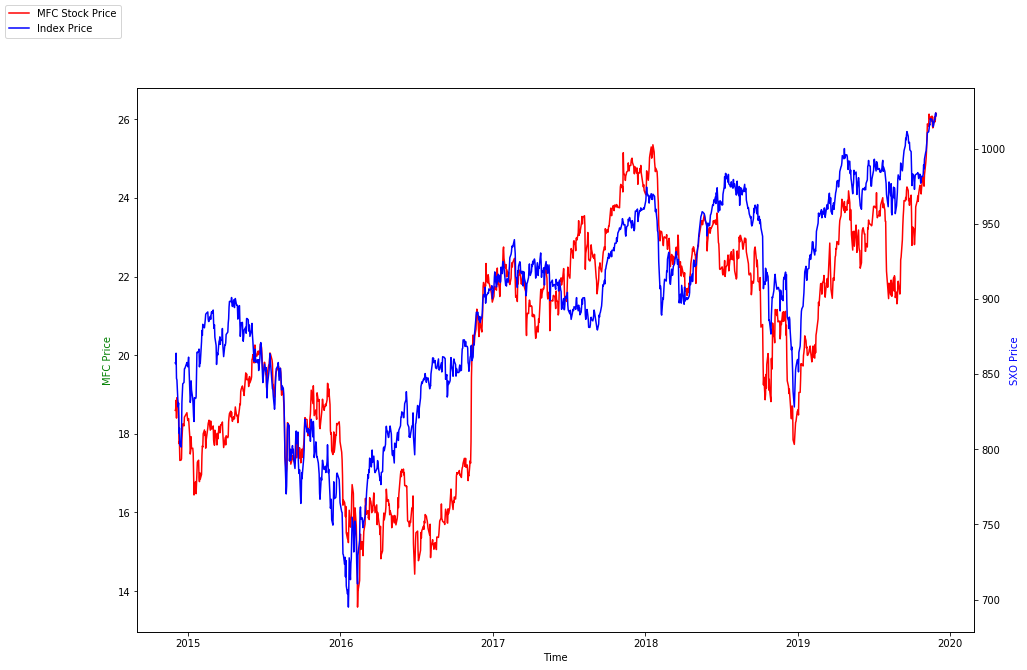

In [0]:

fig, graph1 = plt.subplots(figsize=(15,10))
graph2 = graph1.twinx()
graph1.plot(mfc.Adj_Close, 'r', label = "MFC Stock Price") # plotting t, a separately 
graph2.plot(sxo.Price, 'b', label = "Index Price") # plotting t, b separately 

graph1.set_xlabel('Time')
graph1.set_ylabel('MFC Price', color='g')
graph2.set_ylabel('SXO Price', color='b')
fig.legend(loc="upper left")
plt.show()

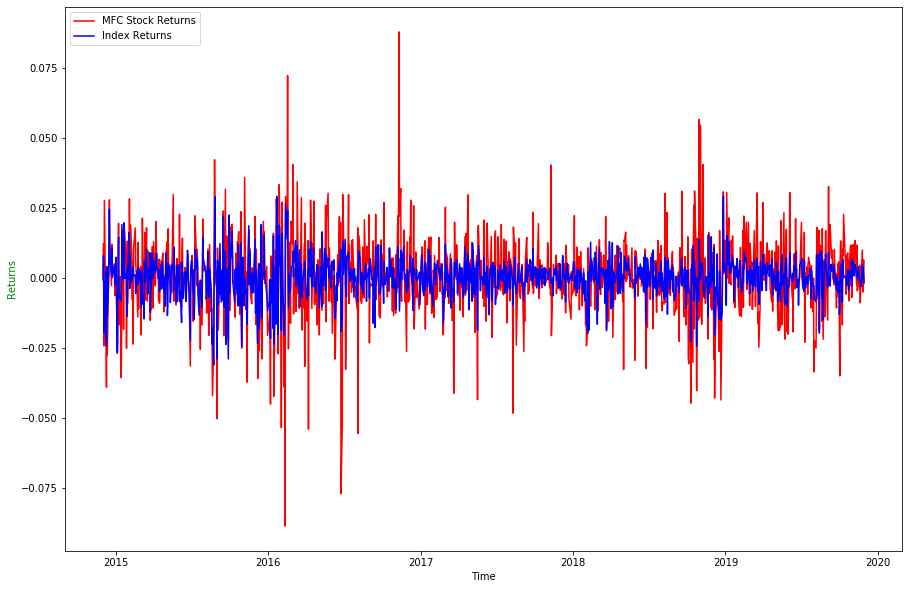

In [0]:
fig, graph3 = plt.subplots(figsize=(15,10))
graph3.plot(mfc.log_return, 'r', label = "MFC Stock Returns") # plotting t, a separately 
graph3.plot(sxo.log_return, 'b', label = "Index Returns") # plotting t, b separately 
graph3.set_xlabel('Time')
graph3.set_ylabel('Returns', color='g')
graph3.legend(loc="upper left")
plt.show()

#Pricing Function Definition 

These are functions I defined inorder to price the portfolio define before so the program knows. 

In [0]:
def d2d1(T, t, Vol, r, S, K):
  #Just assume T are datetime numbers
    Tau = (T-t).days/365
    d2 = (np.log(S/K) + Tau*(r-.5*np.power(Vol,2)))/ (Vol*np.sqrt(Tau))
    d1 = (np.log(S/K) + Tau*(r+.5*np.power(Vol,2)))/ (Vol*np.sqrt(Tau))
    return d2, d1

In [0]:
def bsmcall(d2, d1, K, S, T, t, r):
    Tau = (T-t).days/365
    callprice = S* stats.norm.cdf(d1) - K* np.exp(-r*Tau) * stats.norm.cdf(d2)
    return callprice


In [0]:
def bsmput(d2, d1, K, S, T, t, r):
    Tau = (T-t).days/365
    putprice = -S* stats.norm.cdf(-d1) + K* np.exp(-r*Tau) * stats.norm.cdf(-d2)
    return putprice

In [0]:
def bsmdigitalput(d2, d1, K, T, t, r):
    Tau = (T-t).days/365
    putdigitalprice = np.exp(-r*Tau) * stats.norm.cdf(-d2)
    return putdigitalprice

# **PART 2**

##Section 5: VAR

$\Delta_{SXO} = -26780.87991 $

$\Delta_{MFC} = -0.20$

$\textit{Replacing } w_i = \Delta_i S_i $
$$ \sigma_p^2 = \sum_i w_i^2 \sigma_{i}^2 + \sum_i \sum_{j \neq i} w_i w_j \sigma_i \sigma_j \rho_{ij}$$

In [0]:
sxo_delta = -26780.87991
mfc_delta = -.20
mfc_SO30 = mfc.Adj_Close['2019-10-30']
sxo_SO30 = sxo.Price['2019-10-30']
mfc_sigma2 = np.power(mfc_sigma,2)/52
sxo_sigma2 = np.power(sxo_sigma,2)/52

varsigma2=np.power(mfc_delta,2)*mfc_sigma2*np.power(mfc_SO30,2) + 2*mfc_delta*sxo_delta*corr*np.sqrt(mfc_sigma2)*np.sqrt(sxo_sigma2)*sxo_SO30*mfc_SO30 + np.power(sxo_delta,2)*sxo_sigma2* np.power(sxo_SO30,2)
weeklystddev = np.sqrt(varsigma2)
VAR95 = stats.norm.ppf(.95)*weeklystddev
VAR99 = stats.norm.ppf(.99)*weeklystddev

In [0]:
print(weeklystddev)

417660.1425774551


$$\textit{Weekly Standard Deviation } \sigma_{weekly} = \$417660.14$$

In [0]:
print(VAR95)

686989.800351596


$$Var_{X \%} = N^{-1}(X \%) \sigma_{weekly}$$
$$Var_{95 \%} = N^{-1}(95 \%) (\$417660.14) = \$686989.80$$

In [0]:
print(VAR99)

971622.7847566571


$$Var_{99 \%} = N^{-1}(99 \%) (\$417660.14) = \$971622.78$$

Actual Value lost -$397,062.88

In [0]:
numofstd = 397062.88/weeklystddev
print("Number of Standard Deviations Realized:", numofstd)

print("It did not exceed VAR95")

print("Percentile of realized loss:",stats.norm.cdf(numofstd))

print("None of the other weekly losses were close to exceeding the Var95 from this week ")
print("The week of October 30 to November 6")

Number of Standard Deviations Realized: 0.9506841556621953
It did not exceed VAR95
Percentile of realized loss: 0.8291176331465647
None of the other weekly losses were close to exceeding the Var95 from this week 
The week of October 30 to November 6


##Section 6: Efficient Frontier 

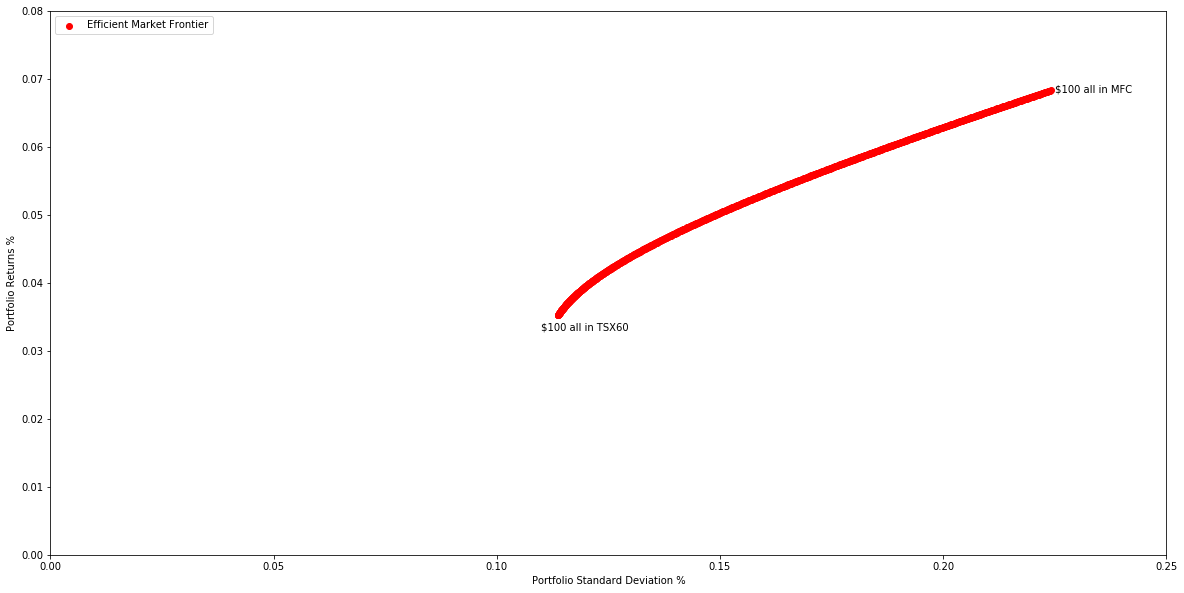

In [0]:
mfc_w = np.arange(0,100.1, .1)
sxo_w = 100-mfc_w

portfolio_sigma2= np.power(mfc_w,2)*np.power(mfc_sigma,2) + 2*mfc_w*sxo_w*corr*mfc_sigma*sxo_sigma + np.power(sxo_w,2)*np.power(sxo_sigma,2)
portfolio_returns = mfc_w * mfc_r + sxo_w *sxo_r
plt.figure(figsize = (20,10))
plt.scatter(np.power(portfolio_sigma2,.5)/100,portfolio_returns/100, color='r', label ="Efficient Market Frontier")
plt.xlabel('Portfolio Standard Deviation %')
plt.ylabel('Portfolio Returns %')
plt.legend(loc="upper left")
plt.annotate("$100 all in TSX60", (.11,.033))
plt.annotate("$100 all in MFC", (.225,.068))
plt.ylim([0,.08])
plt.xlim([0,0.25])
plt.show()

##Section 8: Simulate 


In [0]:
#PRICE OUT THE ASIAN SIDE OF THE PORTFOLIO
r = .02 
s0_sxo = sxo.Price['2019-10-30']
s0_mfc = mfc.Adj_Close['2019-10-30']
w_t0 = np.random.normal(0, 1, 2000)
w_t1 = np.random.normal(0, 1, 2000)
sim_mfc = s0_mfc*np.exp((mfc_r - .5*mfc_sigma2)*(7/365) + pow(mfc_sigma2 *(7/365) ,.5)*(corr*w_t0 + pow(1-pow(corr,2),.5)*w_t1 ))
sim_sxo = s0_sxo*np.exp((sxo_r - .5*sxo_sigma2)*(7/365) + pow(sxo_sigma2 *(7/365),.5)*w_t0)

Asian Side of the Portfolio 
Positions: 
1.   Index: 0 
2.   Asian Call: -20,000 Stike: 975 Maturity: 2019-12-11
3.   Vanilla Call: 12,678 Stike: 940 Maturity: 2019-12-20






In [0]:
#INSTALL THE INTERPOLATE FUNCTION
asian = pd.read_csv('asiancall.csv')
asian
asianinter = interpolate.interp1d(asian.P_Index, asian.P_Asian , fill_value="extrapolate")


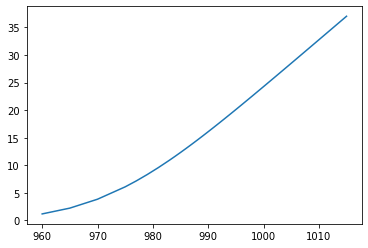

In [0]:
plt.plot(asian.P_Index[1:29], asian.P_Asian[1:29])

In [0]:
T = datetime.date(2019,12,20)
t= datetime.date(2019,11,6)
[sxo_call1_d2, sxo_call1_d1] = d2d1(T,t, .103, .02,sim_sxo,1000)
sxo_call1_price = bsmcall(sxo_call1_d2, sxo_call1_d1, 1000, sim_sxo, T, t, .02)


#Asian Call Pricing with Interperter 
sxo_asian_price = asianinter(sim_sxo) 

In [0]:
Portfolio_sxo_0 = -20000*16.80  + 22009*(21.55)
Portfolio_sxo = -20000*sxo_asian_price + 22009*(sxo_call1_price)

Stock Portfolio


In [0]:
Portfolio_0 = -31513.00*s0_mfc -221940*(.39) + 431826*(.05)

#Put Pricing
T = datetime.date(2019,12,20)
t= datetime.date(2019,11,6)
[mfc_put1_D2, mfc_put1_D1] = d2d1(T,t, .3924, .02, sim_mfc,19)
MFC_Put1 = bsmput(mfc_put1_D2, mfc_put1_D1, 19, sim_mfc,T, t,.02)

#Digital Put Pricing
T = datetime.date(2019,12,11)
t= datetime.date(2019,10,31)
[digD2, digD1] = d2d1(T,t, .23, .02, sim_mfc,24)
MFC_DigitalPut = bsmdigitalput(digD2, digD1, 24,T,t,.02)

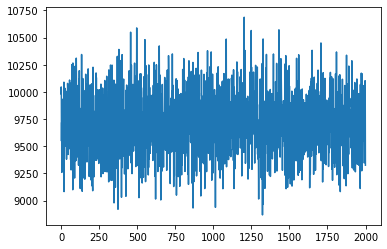

In [0]:
Portfolio = -31513.00*sim_mfc -221940*MFC_DigitalPut + 431826*MFC_Put1
Portfolio_0 -Portfolio 
plt.plot(Portfolio_0 -Portfolio )


Standard Deviation of Portfolio Changes: 13141.224053861117
VAR 95: 253620.6071967594
VAR 99:  261342.3886318282
CVAR: 254846.62601034367
In this cas ethe actual portfolio change exceeded the 95th percentile
Percentile of realized change 1.0


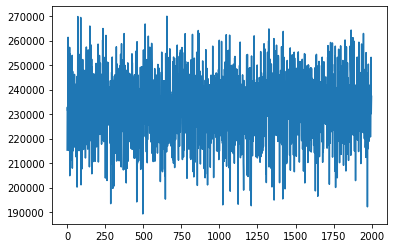

In [0]:
Net = (Portfolio_0-Portfolio) + (Portfolio_sxo_0 - Portfolio_sxo)
plt.plot(Net)
np.average(Net)
print("Standard Deviation of Portfolio Changes:" ,np.std(Net))
print("VAR 95:" , np.percentile(Net, 95))
print("VAR 99: ", np.percentile(Net, 99))

#Calulating CVAR 
print("CVAR:" , np.average(Net[Net > np.percentile(Net, 90) ]))
print("In this cas ethe actual portfolio change exceeded the 95th percentile")
print("Percentile of realized change",stats.norm.cdf(397062.88/np.std(Net)))

In [0]:
#print("Percentile of realized loss:",stats.norm.cdf(397062.88/np.std(Net))

1000.0

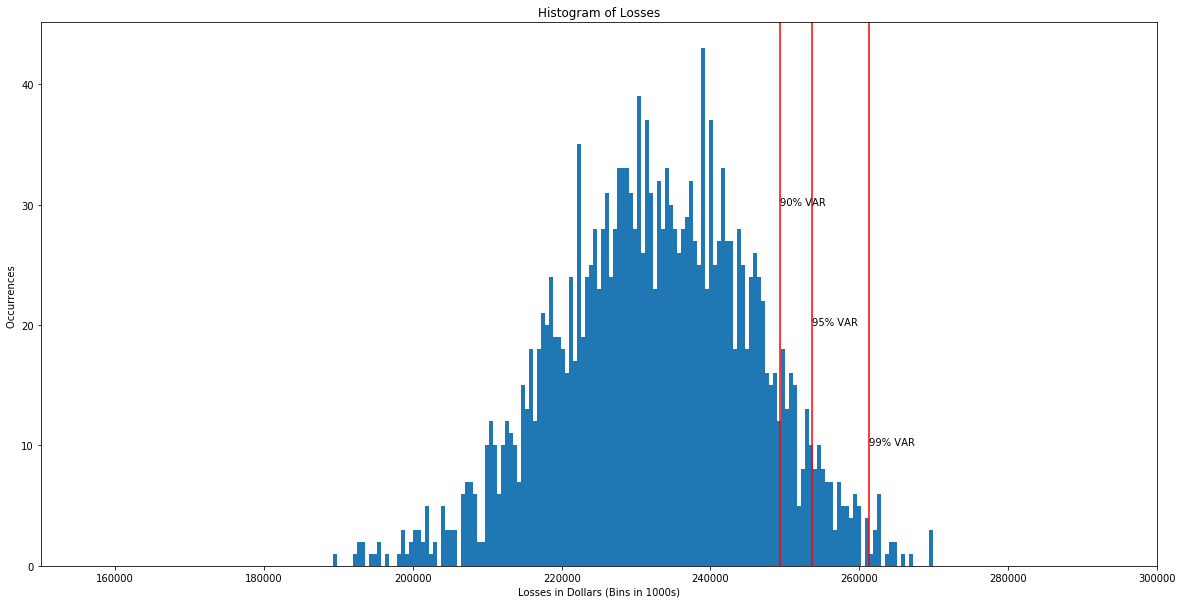

In [0]:
plt.figure(figsize = (20,10))
plt.hist(Net, bins=150)
plt.xlim([150000,300000])
plt.title("Histogram of Losses")
plt.xlabel("Losses in Dollars (Bins in 1000s)")
plt.ylabel("Occurrences ")
plt.axvline(x=np.percentile(Net, 90), color ='r')
plt.annotate("90% VAR", (np.percentile(Net, 90),30))
plt.axvline(x=np.percentile(Net, 95), color ='r')
plt.annotate("95% VAR", (np.percentile(Net, 95),20))
plt.axvline(x=np.percentile(Net, 99), color ='r')
plt.annotate("99% VAR", (np.percentile(Net, 99),10))
(300000-150000)/150


## Section 9: Bootstraping 

In [0]:
boot_mfc = np.zeros(2000)
boot_sxo = np.zeros(2000)
combine = pd.concat([sxo.log_return.dropna(axis = 0), mfc.log_return.dropna(axis = 0)], axis=1, sort=False)
for i in range(0,2000):
  bootstrap = combine.sample(5, replace = "TRUE")
  bootstrap.columns = ["SXO_Returns", "MFC_Returns"]
  ReturnIndex = bootstrap.SXO_Returns.sum()
  ReturnStock = bootstrap.MFC_Returns.sum()
  boot_mfc[i] = mfc.Adj_Close['2019-10-30'] * np.exp(ReturnStock)
  boot_sxo[i] = sxo.Price['2019-10-30'] * np.exp(ReturnIndex)


In [0]:
T = datetime.date(2019,12,20)
t= datetime.date(2019,11,6)
[boot_sxo_call1_d2, boot_sxo_call1_d1] = d2d1(T,t, .103, .02,boot_sxo,1000)
boot_sxo_call1_price = bsmcall(boot_sxo_call1_d2, boot_sxo_call1_d1, 1000, boot_sxo, T, t, .02)

#Asian Call Pricing with Interperter 
boot_sxo_asian_price = asianinter(boot_sxo) 

In [0]:
boot_Portfolio_sxo_0 = -20000*16.80  + 22009*(21.55)
boot_Portfolio_sxo = -20000*boot_sxo_asian_price + 22009*(boot_sxo_call1_price)

In [0]:

boot_Portfolio_0 = -31513.00*s0_mfc -221940*(.39) + 431826*(.05)

#Put Pricing
T = datetime.date(2019,12,20)
t= datetime.date(2019,11,6)
[boot_mfc_put1_D2, boot_mfc_put1_D1] = d2d1(T,t, .3924, .02, boot_mfc,19)
boot_MFC_Put1 = bsmput(boot_mfc_put1_D2, boot_mfc_put1_D1, 19, boot_mfc,T, t,.02)

#Digital Put Pricing
T = datetime.date(2019,12,11)
t= datetime.date(2019,11,6)
[boot_digD2, boot_digD1] = d2d1(T,t, .23, .02, boot_mfc,24)
boot_MFC_DigitalPut = bsmdigitalput(boot_digD2, boot_digD1, 24,T,t,.02)

In [0]:
boot_Portfolio = -31513.00*boot_mfc -221940*boot_MFC_DigitalPut + 431826*boot_MFC_Put1

Standard Deviation of Portfolio Changes: 70122.16367274232
VAR 95: 338974.52258319274
VAR 99:  349466.31889789685
CVAR: 297923.20893129514
In this case the actual portfolio change exceeded the 95th percentile
Percentile of realized change 1.0


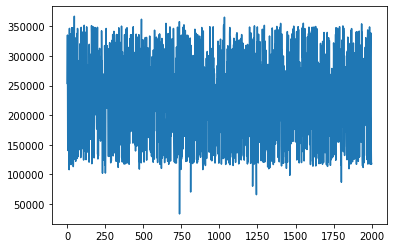

In [0]:
boot_Net = (boot_Portfolio_0-boot_Portfolio) + (boot_Portfolio_sxo_0 - boot_Portfolio_sxo)
plt.plot(boot_Net)
np.average(boot_Net)
print("Standard Deviation of Portfolio Changes:" ,np.std(boot_Net))
print("VAR 95:" , np.percentile(boot_Net, 95))
print("VAR 99: ", np.percentile(boot_Net, 99))

#Calulating CVAR 
print("CVAR:" , np.average(boot_Net[boot_Net > np.percentile(Net, 90) ]))
print("In this case the actual portfolio change exceeded the 95th percentile")
print("Percentile of realized change",stats.norm.cdf(397062.88/np.std(Net)))

In [0]:
np.percentile(boot_Net, 99)/np.std(boot_Net)

4.983678491850935

1000.0

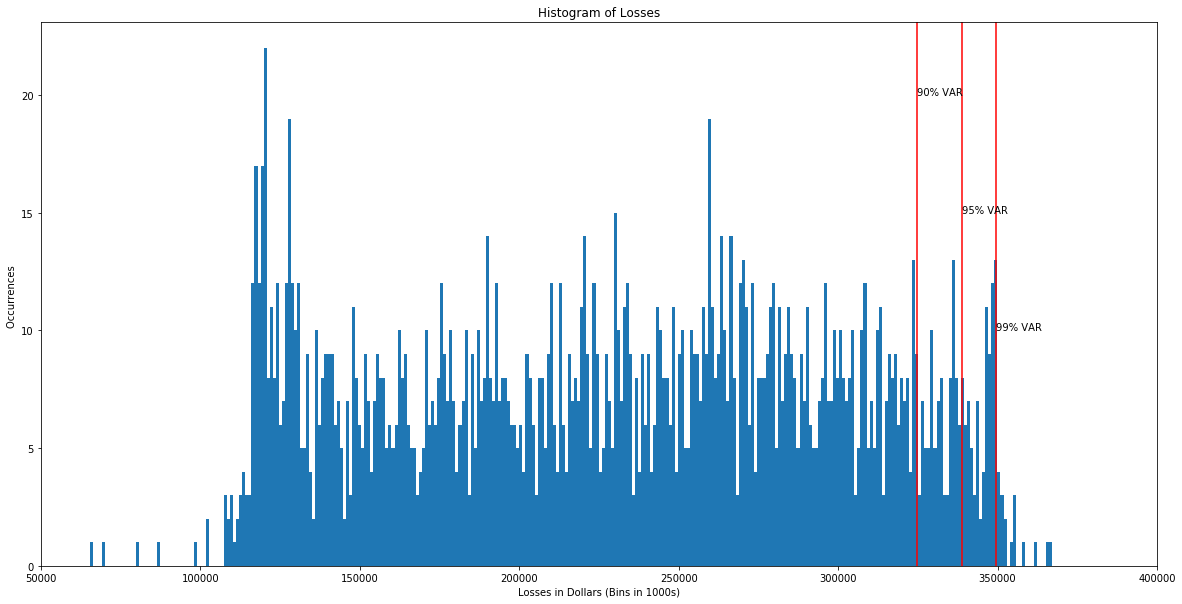

In [0]:
#plt.hist(boot_Net, bins=500)
#plt.xlim([-25000,25000])

plt.figure(figsize = (20,10))
plt.hist(boot_Net, bins=350)
plt.xlim([50000,400000])
plt.title("Histogram of Losses")
plt.xlabel("Losses in Dollars (Bins in 1000s)")
plt.ylabel("Occurrences ")
plt.axvline(x=np.percentile(boot_Net, 90), color ='r')
plt.annotate("90% VAR", (np.percentile(boot_Net, 90),20))
plt.axvline(x=np.percentile(boot_Net, 95), color ='r')
plt.annotate("95% VAR", (np.percentile(boot_Net, 95),15))
plt.axvline(x=np.percentile(boot_Net, 99), color ='r')
plt.annotate("99% VAR", (np.percentile(boot_Net, 99),10))
(400000-50000)/350
